# Adversarial Training

## Importing modules and packages

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import pandas as pd

import module_Reinforce_ActorCritic_beta_batch as racbb

## Training demo

When the training is performed the model is saved into the _models_ folder, while the plots of the episodes' returns and durations are saved into the _plots_ folder.\
A new line in the csv file _resultsTry.csv_, in the _reportFiles_ folder, is added with the following training informations:
- model_name (built with timestamp and training characteristics),
- type_alg (0:reinforce, 2:actor-critic);
- hopper environment (source or target);
- number of training episodes;
- the name of the pre-treined model used, if applicable;
- the reinforce baseline, if applicable;
- discount factor gamma;
- starting learrning rate;
- neural network layer size;
- number of episodes between one sampling and the following;
- random_state;
- array of sampled returns;
- array with sampled moving average of returns;
- array with sampled average of returns from the beginning of training;
- array of sampled times;
- array with sampled moving average of times;
- array with sampled average of times from the beginning of training;
- total trining time


In [ ]:
episodes =500

In [3]:
output_file='reportFiles/resultsTry.csv'

Creation of new CSV file reportFiles/resultsTry.csv.
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]


 20%|██        | 101/500 [00:04<00:26, 15.30it/s]

Training episode: 100
Episode return: 8.835902708574922


 40%|████      | 202/500 [00:09<00:17, 16.94it/s]

Training episode: 200
Episode return: 18.641064587692288


 60%|██████    | 300/500 [00:15<00:12, 15.69it/s]

Training episode: 300
Episode return: 27.86645016938921


 80%|████████  | 401/500 [00:23<00:07, 13.01it/s]

Training episode: 400
Episode return: 28.755289462985132


100%|██████████| 500/500 [00:31<00:00, 15.72it/s]

Training episode: 500
Episode return: 20.83518858494488
Average of the last 100 returns: 23.423017213526393

MODEL NAME: Reinforce_500_b0_hS_rs42_250626_18-26-45.mdl



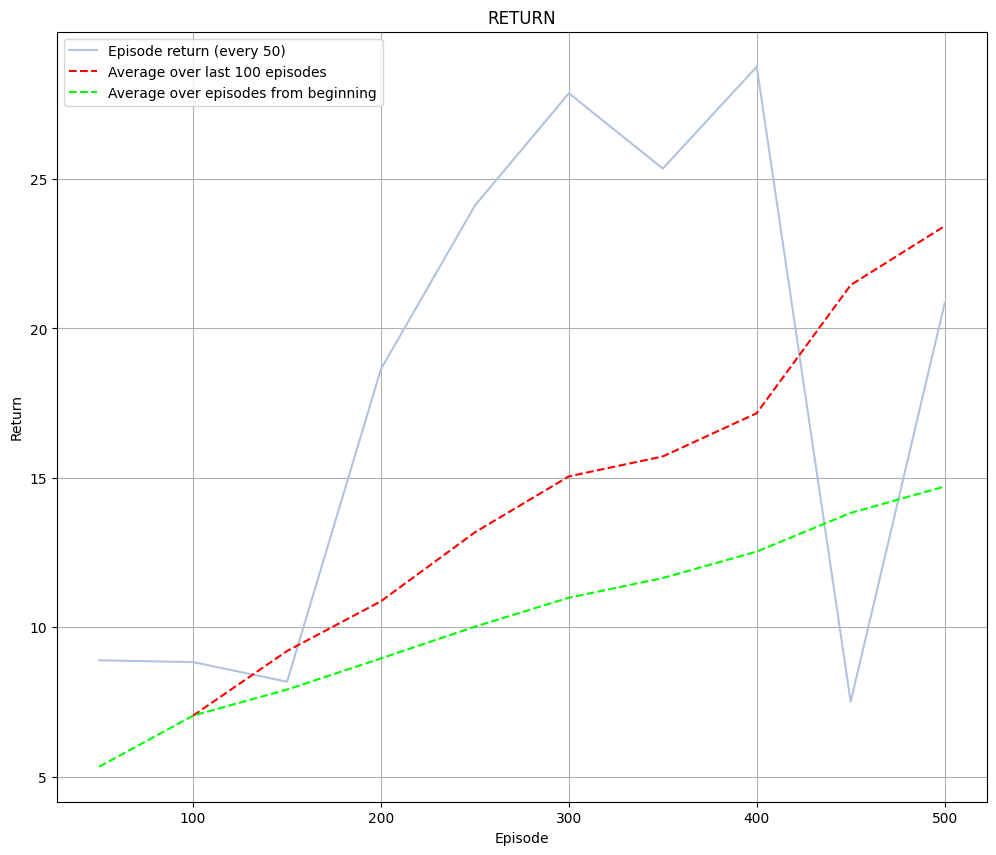

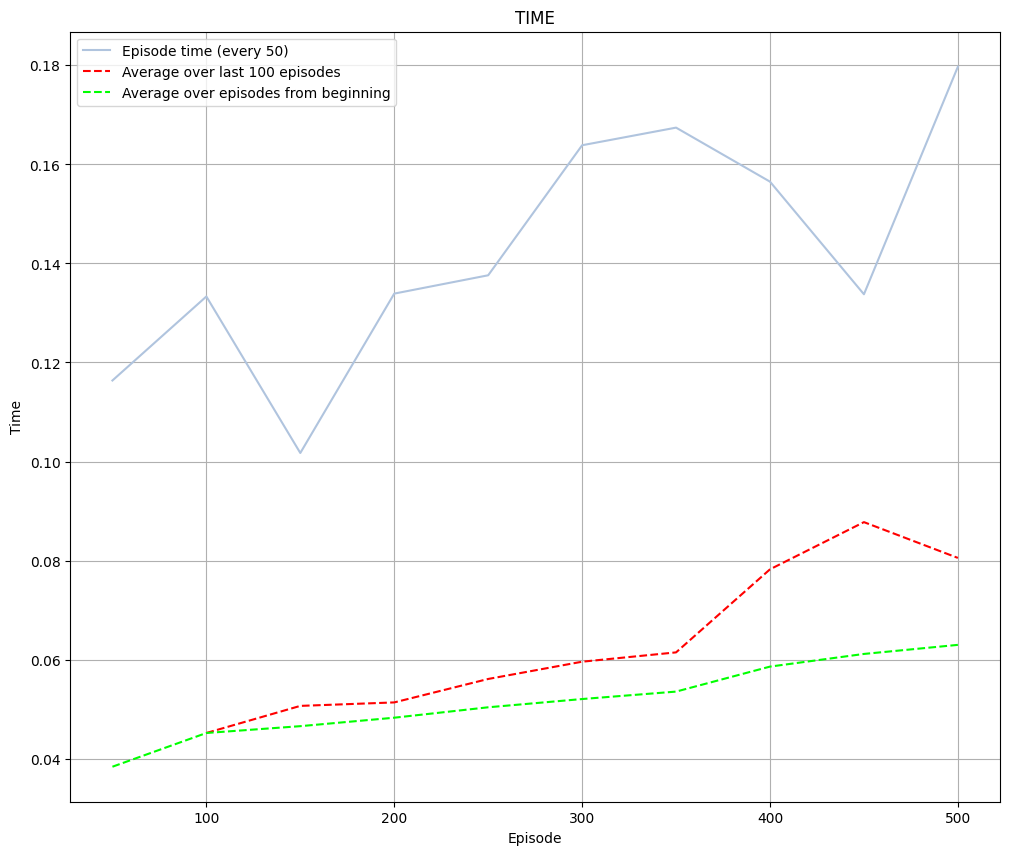

In [4]:
returns_array, times_array, tot_time, model_name = racbb.train(0, n_episodes=episodes, csv_name=output_file, save_every=50, batch_sz=10, print_every=episodes//5, plot=True, pert_bound=[0.005,0.008,0.008,0.01,0.01], random_state=42)

## Test demo

In [5]:
model_name1='Reinforce_50000_b0_hS_rs42_250624_16-07-11.mdl'

In [6]:
returns = racbb.test(0, model_name1, hopper='S', n_episodes=10, render=False, gamma=0.99, optim_lr=1e-3, layer_size=64, pert_bound=0.01, random_state=42, device='cpu')

Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Episode: 0 | Return: 742.8681778953079
Episode: 1 | Return: 706.8619676412944
Episode: 2 | Return: 715.2104594800333
Episode: 3 | Return: 763.3529356408261
Episode: 4 | Return: 725.5017680610812
Episode: 5 | Return: 716.5396467935295
Episode: 6 | Return: 726.1960287549088
Episode: 7 | Return: 722.6517308796768
Episode: 8 | Return: 693.9443496040246
Episode: 9 | Return: 726.0554900099294


## Results with different training characteristics and curricula

### Loading data from csvs

In [7]:
csv_beta='reportFiles/beta.csv'
csv_beta_adv_fixed='reportFiles/beta_advers_fixed.csv'       #0.1
csv_beta_adv_curric='reportFiles/beta_advers_curric.csv'     #[0,0.05,0.1,0.2,0.4]
csv_beta_adv_flat='reportFiles/beta_advers_curric_flat.csv'  #[0.05,0.05,0.05,0.08,0.08]
csv_beta_adv_slow='reportFiles/beta_advers_curric_slow.csv'  #[0.005,0.01,0.01,0.02,0.05]

csv_beta_batch='reportFiles/beta_batch.csv'
csv_beta_batch_adv_flat='reportFiles/beta_batch_advers_curric_flat.csv'                   #[0.05,0.05,0.05,0.08,0.08]
csv_beta_batch_adv_slow='reportFiles/beta_batch_advers_curric_slow.csv'                   #[0.005,0.01,0.01,0.02,0.05]
csv_beta_batch_adv_slowslow='reportFiles/beta_batch_advers_curric_slowslow_sum_clip.csv'  #[0.005,0.005,0.008,0.008,0.01]
csv_beta_batch_adv_midslow='reportFiles/beta_batch_advers_curric_midslow_sum_clip.csv'    #[0.005,0.008,0.008,0.01,0.01]
csv_beta_batch_adv_mid='reportFiles/beta_batch_advers_curric_mid_sum_clip.csv'            #[0.005,0.008,0.01,0.015,0.02]


csv_beta_batchDyn='reportFiles/beta_batchDyn.csv'

loaded_beta = pd.read_csv(csv_beta, index_col='model_name')
loaded_beta_adv_fixed = pd.read_csv(csv_beta_adv_fixed, index_col='model_name')
loaded_beta_adv_curric = pd.read_csv(csv_beta_adv_curric, index_col='model_name')
loaded_beta_adv_curric_flat = pd.read_csv(csv_beta_adv_flat, index_col='model_name')
loaded_beta_adv_curric_slow = pd.read_csv(csv_beta_adv_slow, index_col='model_name')

loaded_beta_batch = pd.read_csv(csv_beta_batch, index_col='model_name')
loaded_beta_batch_adv_curric_flat = pd.read_csv(csv_beta_batch_adv_flat, index_col='model_name')
loaded_beta_batch_adv_curric_slow = pd.read_csv(csv_beta_batch_adv_slow, index_col='model_name')
loaded_beta_batch_adv_curric_slowslow = pd.read_csv(csv_beta_batch_adv_slowslow, index_col='model_name')
loaded_beta_batch_adv_curric_midslow = pd.read_csv(csv_beta_batch_adv_midslow, index_col='model_name')
loaded_beta_batch_adv_curric_mid = pd.read_csv(csv_beta_batch_adv_mid, index_col='model_name')

loaded_beta_batchDyn = pd.read_csv(csv_beta_batchDyn, index_col='model_name')
display(loaded_beta)

,type_alg,hopper,n_episodes,trained_model,baseline,gamma,optim_lr,layer_size,save_every,random_state,returns,returns_AvgLast,returns_AvgBeginning,times,times_AvgLast,times_AvgBeginning,tot_time
model_name,,,,,,,,,,,,,,,,,
Reinforce_500_b0_hS_rs42_250615_11-14-54,0,S,500,NaN,0,0.99,0.001,64,50,42,"[np.float64(7.116186368013153), np.float64(6.6...","[np.float64(3.1887149551261484), np.float64(6....","[np.float64(6.377429910252294), np.float64(6.5...","[0.03132033348083496, 0.024535417556762695, 0....","[np.float64(0.015176191329956054), np.float64(...","[0.030352382659912094, 0.030843331813812255, 0...",28.506197
Reinforce_500_b0_hS_rs42_250615_12-15-05,0,S,500,NaN,0,0.99,0.001,64,50,42,"[np.float64(7.116186368013153), np.float64(6.6...","[np.float64(3.1887149551261484), np.float64(6....","[np.float64(6.377429910252294), np.float64(6.5...","[0.04729914665222168, 0.03174543380737305, 0.0...","[np.float64(0.020460360050201416), np.float64(...","[0.0409207201004028, 0.04210907936096191, 0.04...",40.873480
Reinforce_500_b0_hS_rs42_250615_12-41-47,0,S,500,NaN,0,0.99,0.001,64,50,42,"[np.float64(7.116186368013153), np.float64(6.6...","[np.float64(3.1887149551261484), np.float64(6....","[np.float64(6.377429910252294), np.float64(6.5...","[0.022279024124145508, 0.015642881393432617, 0...","[np.float64(0.009431414604187012), np.float64(...","[0.018862829208374017, 0.018238677978515624, 0...",12.248685
Reinforce_500_b0_hS_rs42_250615_12-44-18,0,S,500,NaN,0,0.99,0.001,64,50,42,"[np.float64(7.116186368013153), np.float64(6.6...","[np.float64(3.1887149551261484), np.float64(6....","[np.float64(6.377429910252294), np.float64(6.5...","[0.029721498489379883, 0.02626180648803711, 0....","[np.float64(0.010050277709960937), np.float64(...","[0.020100555419921874, 0.0208933711051941, 0.0...",12.690459
Reinforce_500_b0_hS_rs42_250615_12-55-37,0,S,500,NaN,0,0.99,0.001,64,50,42,"[np.float64(7.116186368013153), np.float64(6.6...","[np.float64(3.1887149551261484), np.float64(6....","[np.float64(6.377429910252294), np.float64(6.5...","[0.014010906219482422, 0.020409584045410156, 0...","[np.float64(0.00846400260925293), np.float64(0...","[0.01692800521850586, 0.018093740940093996, 0....",11.047480
Reinforce_500_b0_hS_rs35_250615_12-55-50,0,S,500,NaN,0,0.99,0.001,64,50,35,"[np.float64(9.156283791250582), np.float64(8.4...","[np.float64(4.571484859455414), np.float64(8.9...","[np.float64(9.14296971891083), np.float64(8.98...","[0.012748479843139648, 0.02090764045715332, 0....","[np.float64(0.007456731796264648), np.float64(...","[0.014913463592529293, 0.014434888362884516, 0...",10.341940
Reinforce_50000_b0_hS_rs42_250615_15-03-27,0,S,50000,NaN,0,0.99,0.001,64,50,42,"[7.572439506793004, 9.547543771951661, 2.67774...","[3.2491788316700037, 7.221923415659271, 7.6373...","[6.498357663340004, 7.221923415659271, 7.25768...","[0.007800102233886719, 0.009614944458007812, 0...","[0.008942582607269288, 0.013194687366485595, 0...","[0.017885165214538572, 0.013194687366485599, 0...",2799.267005
Reinforce_50000_b0_hS_rs35_250615_15-50-07,0,S,50000,NaN,0,0.99,0.001,64,50,35,"[9.156276590760791, 15.257689155894852, 5.6195...","[4.571482084013661, 9.256997039075037, 10.3587...","[9.14296416802732, 9.256997039075044, 9.953507...","[0.005660295486450195, 0.007241725921630859, 0...","[0.0035942959785461425, 0.00687483549118042, 0...","[0.007188591957092283, 0.006874835491180423, 0...",3254.020073
Reinforce_50000_b0_hS_rs254_250615_16-44-21,0,S,50000,NaN,0,0.99,0.001,64,50,254,"[3.193978209478468, 7.875777093903602, 6.14615...","[1.6429063433191993, 3.8893953052799013, 5.326...","[3.285812686638399, 3.889395305279901, 4.64654...","[0.014105081558227539, 0.01582646369934082, 0....","[0.0042234206199646, 0.00908167839050293, 0.01...","[0.008446841239929196, 0.009081678390502928, 0...",3158.419870


### Plotting training returns

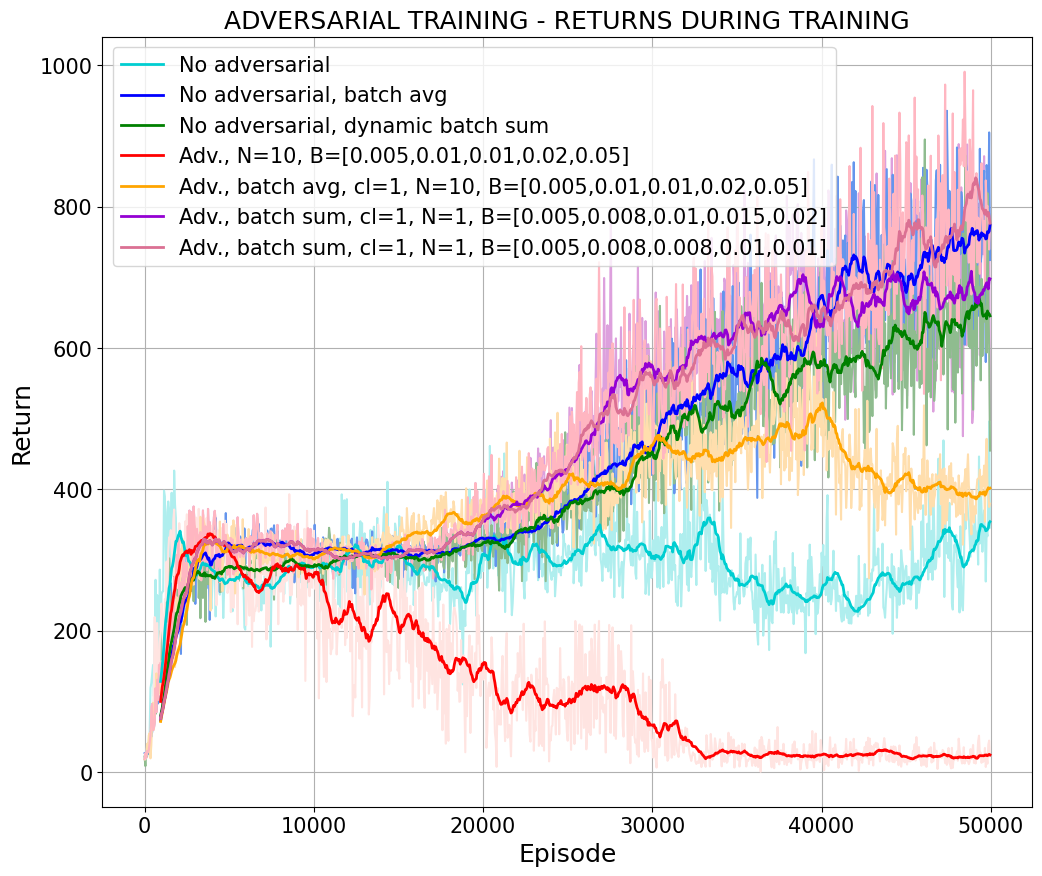

In [8]:
n_episodes=50000
csvs=[loaded_beta, loaded_beta_batch, loaded_beta_batchDyn, loaded_beta_adv_curric_slow, loaded_beta_batch_adv_curric_slow,loaded_beta_batch_adv_curric_mid, loaded_beta_batch_adv_curric_midslow]
save_every=50

type_names=['No adversarial','No adversarial, batch avg', 'No adversarial, dynamic batch sum', 'Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]', 'Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01,0.02,0.05]', 'Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01,0.015,0.02]', 'Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.008,0.01,0.01]']
colors=['paleturquoise','cornflowerblue','darkseagreen','mistyrose','navajowhite','plum','lightpink'] #thistle, 
colors_dark=['darkturquoise','blue','green','red','orange','darkviolet','palevioletred'] #

plt.figure(figsize=(12,10))
plt.title('ADVERSARIAL TRAINING - RETURNS DURING TRAINING', fontsize=18)
for n_csv in range(len(csvs)):
    avg_type=np.zeros((1000,))
    avg_moving=np.zeros((981,))
    df = csvs[n_csv]
    sub_df = df[(df['n_episodes']==n_episodes)]
    for index, row in sub_df.iterrows():
        return_array = eval(row['returns'])
        moving_avg = (np.convolve(return_array, np.ones(20), 'valid') / 20)
        avg_type+=return_array
        avg_moving+=moving_avg
        #line = plt.plot(np.arange(len(return_array))*save_every, return_array, c=colors[n_csv], zorder=0,label='_nolegend_')
        z=3
        if n_csv==5: z=1
    line = plt.plot(np.arange(len(avg_type))*save_every, avg_type/len(sub_df), c=colors[n_csv], zorder=z, label='_nolegend_')
    line = plt.plot(np.arange(len(avg_moving))*save_every+19*save_every, avg_moving/len(sub_df), c=colors_dark[n_csv], zorder=5, label=type_names[n_csv], linewidth=2)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Return', fontsize=18)
plt.legend(fontsize=15)
plt.grid()
#plt.savefig('plots/AdversarialTraining_returns.png', dpi=300)
plt.show()


### Results on test

In [ ]:
means=[]
stds=[]
returns_noAdv = []
returns_adv01 = []
for n_csv in range(len(csvs)):
    print('Testing:',type_names[n_csv])
    df = csvs[n_csv]
    sub_df = df[(df['n_episodes']==n_episodes)]
    list_noAdv = []
    list_verylowAdv = []
    list_lowlowAdv = []
    list_lowAdv = []
    list_highAdv = []
    std_list_noAdv = []
    std_list_verylowAdv = []
    std_list_lowlowAdv = []
    std_list_lowAdv = []
    std_list_highAdv = []
    for index, row in sub_df.iterrows():
        model_name=index+'.mdl'
        s = row['random_state']
        # No adversarial
        returns = racbb.test(0, model_name, hopper='S', n_episodes=50, render=False, gamma=0.99, optim_lr=1e-3, layer_size=64, pert_bound=None, random_state=s, device='cpu', print_res=False)
        list_noAdv.append(returns)
        # Very low adversarial
        returns = racbb.test(0, model_name, hopper='S', n_episodes=50, render=False, gamma=0.99, optim_lr=1e-3, layer_size=64, pert_bound=0.005, random_state=s, device='cpu', print_res=False)
        list_verylowAdv.append(returns)
        # Low low adversarial
        returns = racbb.test(0, model_name, hopper='S', n_episodes=50, render=False, gamma=0.99, optim_lr=1e-3, layer_size=64, pert_bound=0.01, random_state=s, device='cpu', print_res=False)
        list_lowlowAdv.append(returns)
        # Low adversarial
        returns = racbb.test(0, model_name, hopper='S', n_episodes=50, render=False, gamma=0.99, optim_lr=1e-3, layer_size=64, pert_bound=0.05, random_state=s, device='cpu', print_res=False)
        list_lowAdv.append(returns)
        # High adversarial
        returns = racbb.test(0, model_name, hopper='S', n_episodes=50, render=False, gamma=0.99, optim_lr=1e-3, layer_size=64, pert_bound=0.1, random_state=s, device='cpu', print_res=False)
        list_highAdv.append(returns)
    array_noAdv = np.array(list_noAdv)
    array_verylowAdv = np.array(list_verylowAdv)
    array_lowlowAdv = np.array(list_lowlowAdv)
    array_lowAdv = np.array(list_lowAdv)
    array_highAdv = np.array(list_highAdv)
    returns_noAdv.append(array_noAdv)
    returns_adv01.append(array_lowlowAdv)
    means_list = [array_noAdv.mean(),array_verylowAdv.mean(),array_lowlowAdv.mean(),array_lowAdv.mean(),array_highAdv.mean()]
    stds_list = [array_noAdv.std(axis=1).mean(),array_verylowAdv.std(axis=1).mean(),array_lowlowAdv.std(axis=1).mean(),array_lowAdv.std(axis=1).mean(),array_highAdv.std(axis=1).mean()]
    means.append(means_list)
    stds.append(stds_list)


Testing: No adversarial
Testing: No adversarial, batch avg
Testing: No adversarial, dynamic batch sum
Testing: Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]
Testing: Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01,0.02,0.05]
Testing: Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01,0.015,0.02]
Testing: Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.008,0.01,0.01]


In [8]:
ix=[['Training']*len(type_names),type_names]
cols=[['Test']*5,['No adv.','0.005','0.01','0.05', '0.1']]
print('MEAN')
display(pd.DataFrame(np.array(means),columns=cols, index=ix))
print('STANDARD DEVIATION')
display(pd.DataFrame(np.array(stds),columns=cols, index=ix))

MEAN


Test  \
                                                                No adv.   
Training No adversarial                                      380.220404   
         No adversarial, batch avg                           813.192672   
         No adversarial, dynamic batch sum                   646.689688   
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]            72.584987   
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...  431.326347   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...  669.300646   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  915.888013   

                                                                         \
                                                                  0.005   
Training No adversarial                                      395.875855   
         No adversarial, batch avg                           797.955490   
         No adversarial, dynamic batch sum                   609.271440   
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]           127.345623   
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...  422.249846   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...  660.617320   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  880.860912   

                                                                         \
                                                                   0.01   
Training No adversarial                                      390.347113   
         No adversarial, batch avg                           771.809656   
         No adversarial, dynamic batch sum                   602.296170   
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]           127.518897   
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...  414.517824   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...  646.034310   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  846.101464   

                                                                         \
                                                                   0.05   
Training No adversarial                                      383.235871   
         No adversarial, batch avg                           662.768336   
         No adversarial, dynamic batch sum                   521.680092   
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]           135.806280   
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...  376.199057   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...  547.646742   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  628.631484   

                                                                         
                                                                    0.1  
Training No adversarial                                      323.253134  
         No adversarial, batch avg                           506.170094  
         No adversarial, dynamic batch sum                   448.461927  
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]           123.448110  
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...  323.334074  
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...  466.537094  
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  492.028833

STANDARD DEVIATION


Test  \
                                                                No adv.   
Training No adversarial                                       59.702516   
         No adversarial, batch avg                            84.893173   
         No adversarial, dynamic batch sum                    86.152538   
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]            40.261844   
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...   25.541820   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...   50.160712   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  161.230774   

                                                                         \
                                                                  0.005   
Training No adversarial                                       60.082164   
         No adversarial, batch avg                            86.379700   
         No adversarial, dynamic batch sum                    69.222918   
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]            21.055809   
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...   22.947997   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...   48.304508   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  149.579037   

                                                                         \
                                                                   0.01   
Training No adversarial                                       66.517285   
         No adversarial, batch avg                            82.469670   
         No adversarial, dynamic batch sum                    62.691163   
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]            21.593810   
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...   24.609720   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...   39.219790   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  146.498402   

                                                                        \
                                                                  0.05   
Training No adversarial                                      60.426372   
         No adversarial, batch avg                           34.043489   
         No adversarial, dynamic batch sum                   22.972756   
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]           29.841821   
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...  16.020612   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...  37.921467   
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  97.342398   

                                                                        
                                                                   0.1  
Training No adversarial                                      50.574122  
         No adversarial, batch avg                           36.901958  
         No adversarial, dynamic batch sum                   14.144604  
         Adv., N=10, B=[0.005,0.01,0.01,0.02,0.05]           59.052725  
         Adv., batch avg, cl=1, N=10, B=[0.005,0.01,0.01...  34.233387  
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.01...  15.913979  
         Adv., batch sum, cl=1, N=1, B=[0.005,0.008,0.00...  39.953362

#### Save results on csv file

In [9]:
returns_df=pd.DataFrame({'No adv; No adv':pd.Series(returns_noAdv[1].reshape(-1)), 'No adv; Adv 0.01':pd.Series(returns_adv01[1].reshape(-1)), 'Adv; No adv':pd.Series(returns_noAdv[6].reshape(-1)), 'Adv; Adv 0.01':pd.Series(returns_adv01[6].reshape(-1))})
returns_df.to_csv('reportFiles/adversarial_test_results.csv')

#### Plotting distributions of returns

In [2]:
returns_df=pd.read_csv('reportFiles/adversarial_test_results.csv', index_col='index')

TEST RETURNS


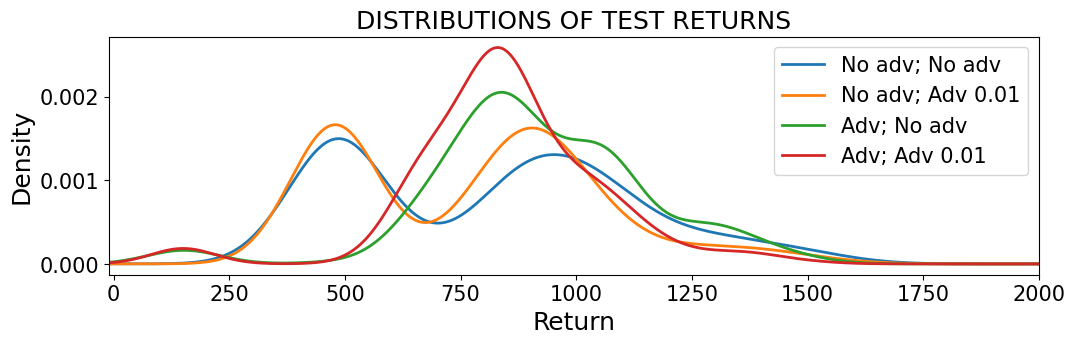

In [19]:
print("TEST RETURNS")
fig, axs = plt.subplots(1,1, figsize=(12,3.5))
returns_df.plot.density(ax=axs,legend=True, lw=2, xlim=(-10,2000))#, fontsize=18)
axs.set_title('DISTRIBUTIONS OF TEST RETURNS', fontsize=18)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Return', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.legend(fontsize=15)
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('plots/AdversarialTraining_distributionsTestReturns.png', dpi=300)
plt.show()